In [202]:
import numpy as np
from skimage import io, transform
from skimage import exposure
import matplotlib.pyplot as plt


(array([  5196.,   2610.,   4997.,   6141.,  11917.,   8661.,  15695.,
         14349.,  19512.,  15843.,  23656.,  14525.,  21221.,  14447.,
         19409.,  11639.,  18334.,  11224.,  14635.,   7044.,   6684.,
          8064.,   7064.,   3802.,   5687.,   4379.,   2968.,   2458.,
          2512.,   2178.,   1467.,   2133.,   1637.,   1434.,   2497.,
          2448.,   2906.,   4398.,   3856., 132773.]),
 array([  0.   ,   6.375,  12.75 ,  19.125,  25.5  ,  31.875,  38.25 ,
         44.625,  51.   ,  57.375,  63.75 ,  70.125,  76.5  ,  82.875,
         89.25 ,  95.625, 102.   , 108.375, 114.75 , 121.125, 127.5  ,
        133.875, 140.25 , 146.625, 153.   , 159.375, 165.75 , 172.125,
        178.5  , 184.875, 191.25 , 197.625, 204.   , 210.375, 216.75 ,
        223.125, 229.5  , 235.875, 242.25 , 248.625, 255.   ]),
 <BarContainer object of 40 artists>)

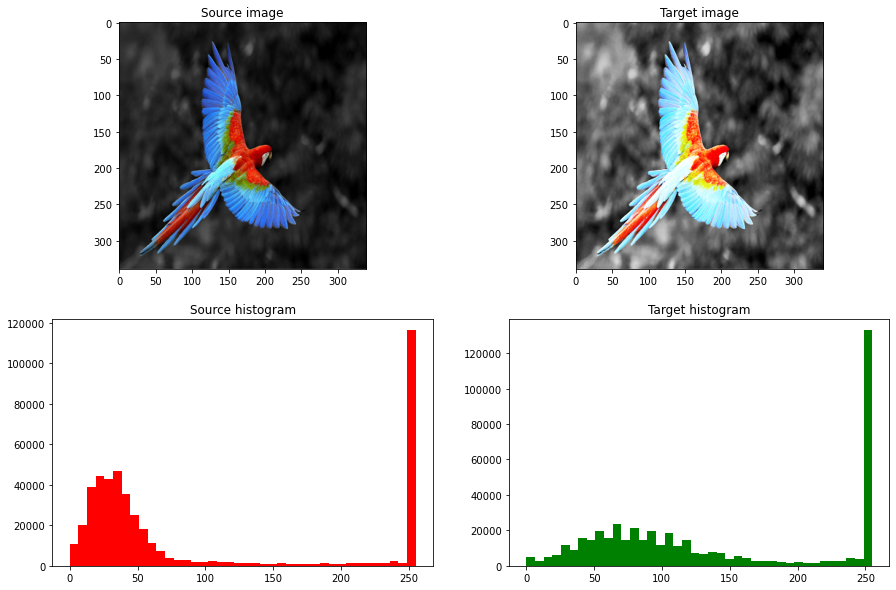

In [203]:
s_i = io.imread('f1.png')
t_i = io.imread('f2.png')
o_i = np.zeros((s_i.shape[0],s_i.shape[1],s_i.shape[2]))

D = 85

plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title("Source image")
plt.imshow(s_i,cmap='gray')

plt.subplot(222)
plt.title("Target image")
plt.imshow(t_i,cmap='gray')

plt.subplot(223)
plt.title("Source histogram")
plt.hist(s_i.ravel(), bins=40, histtype='bar', color='red')

plt.subplot(224)
plt.title("Target histogram")
plt.hist(t_i.ravel(), bins=40, histtype='bar', color='green')

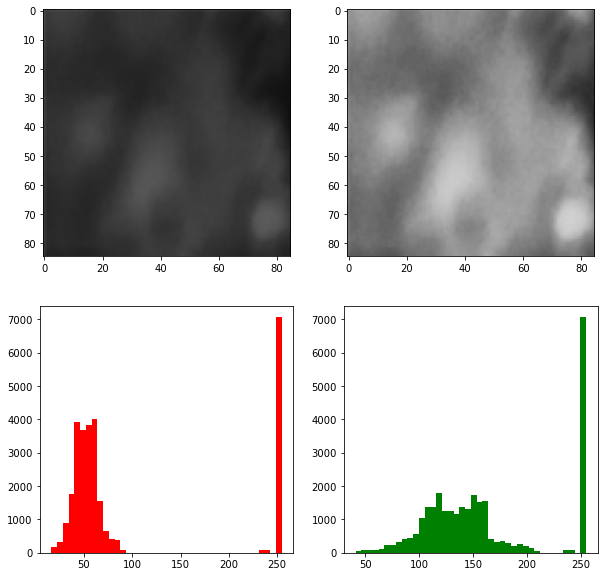

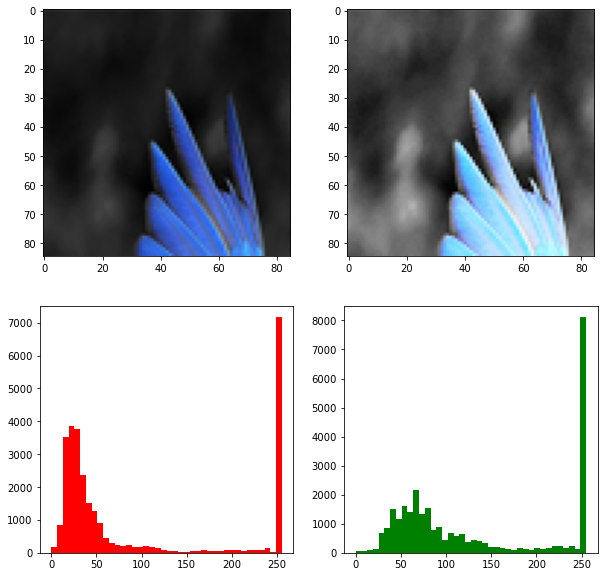

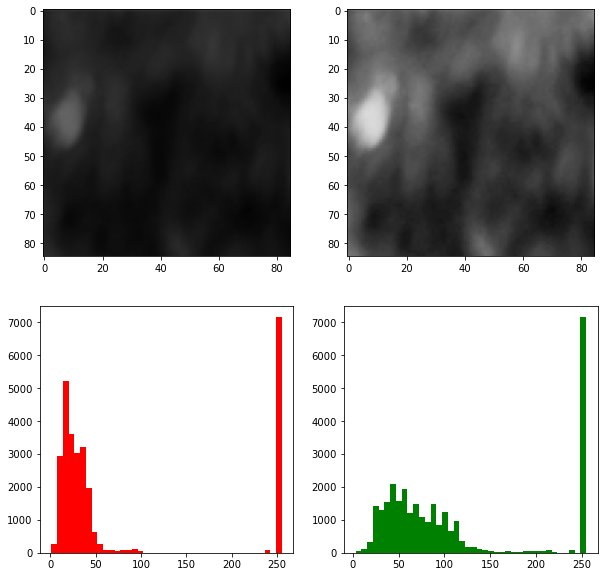

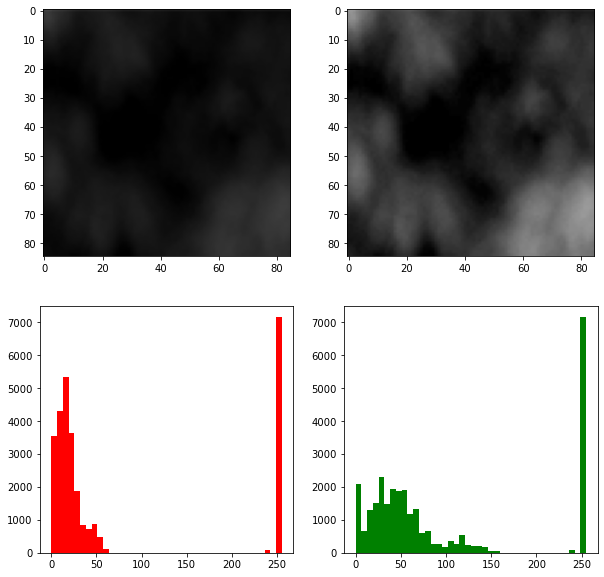

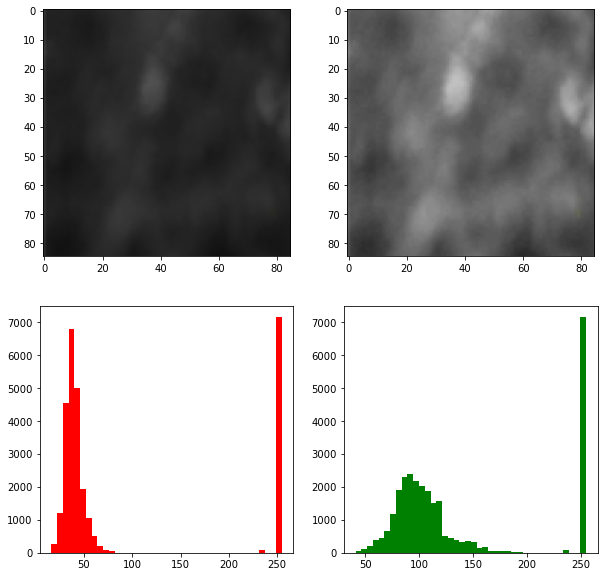

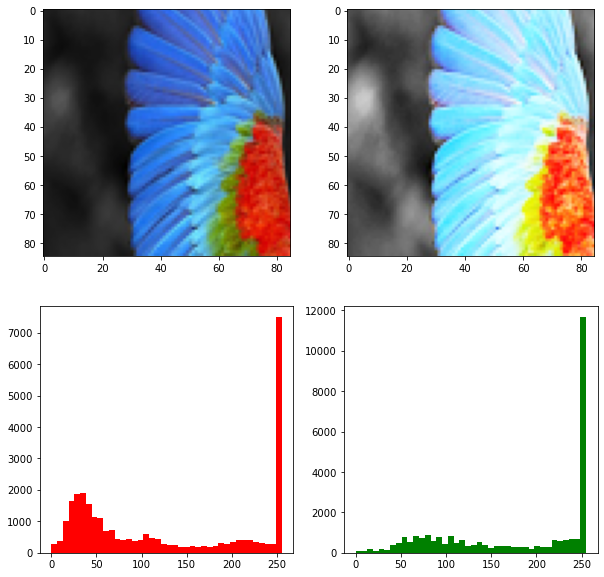

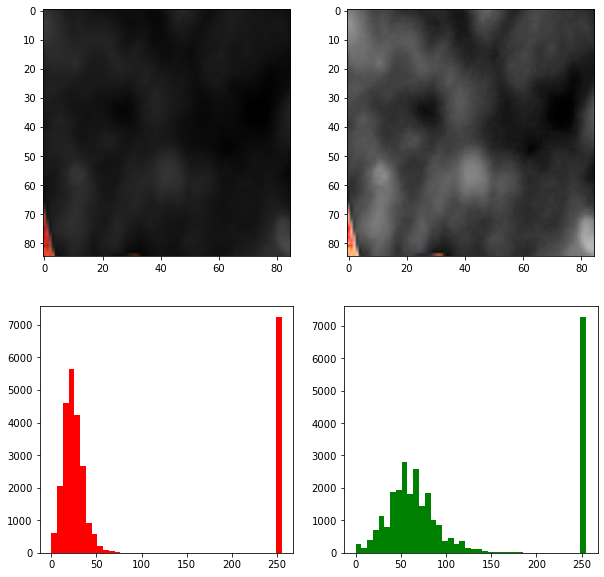

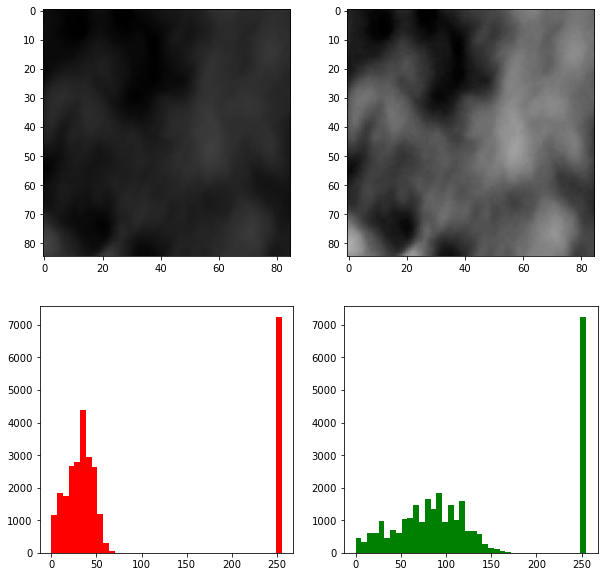

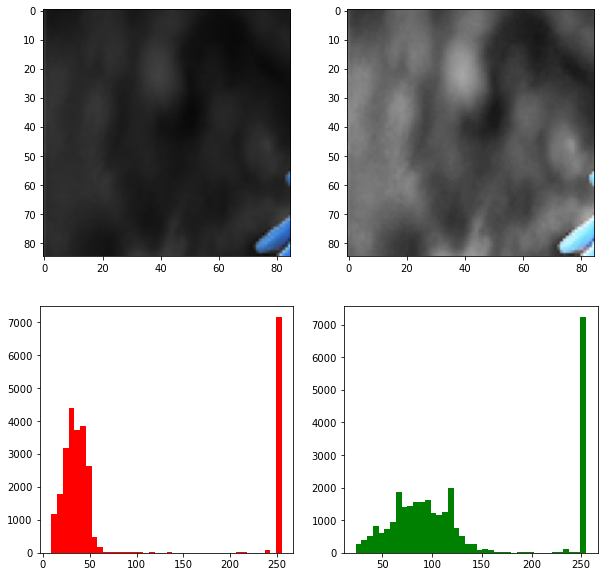

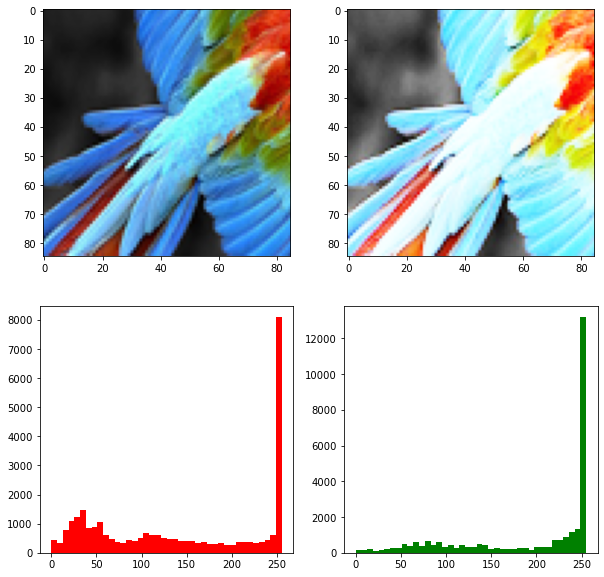

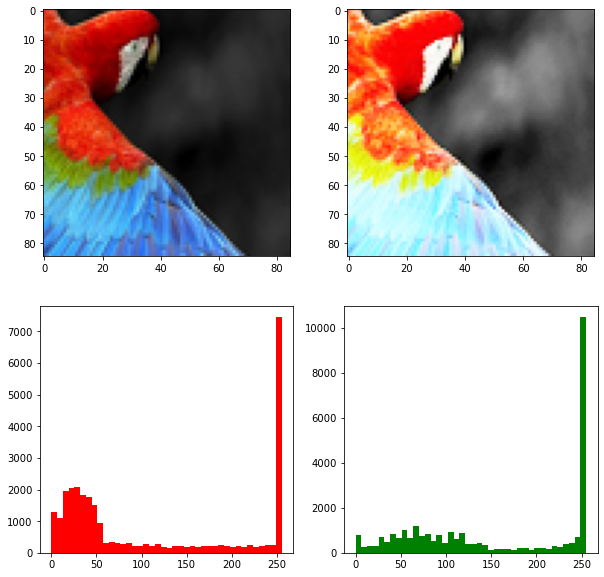

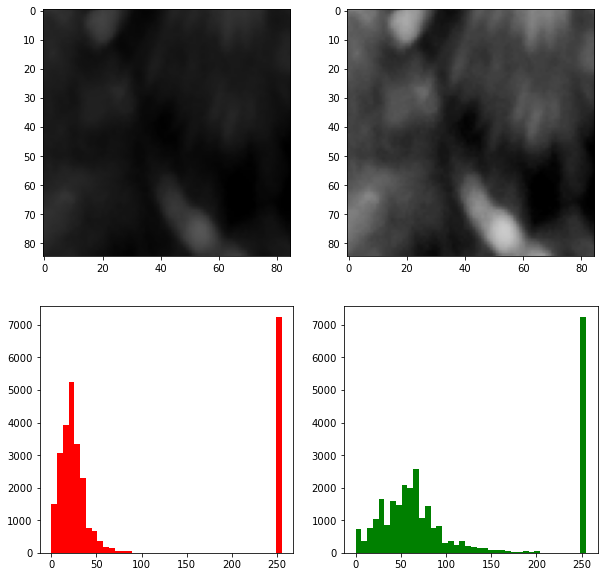

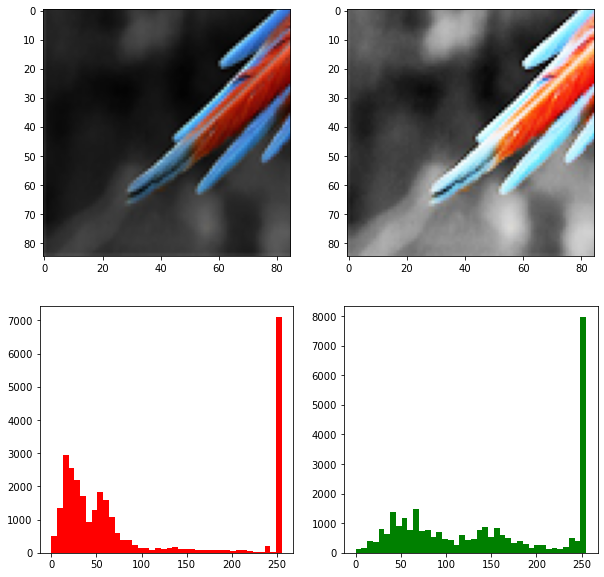

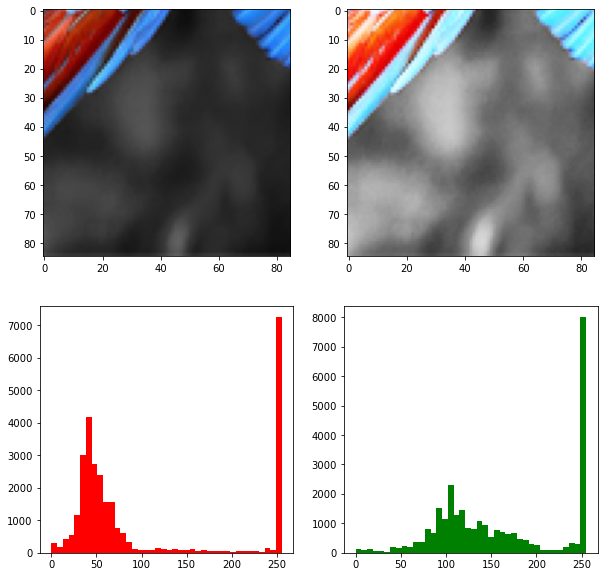

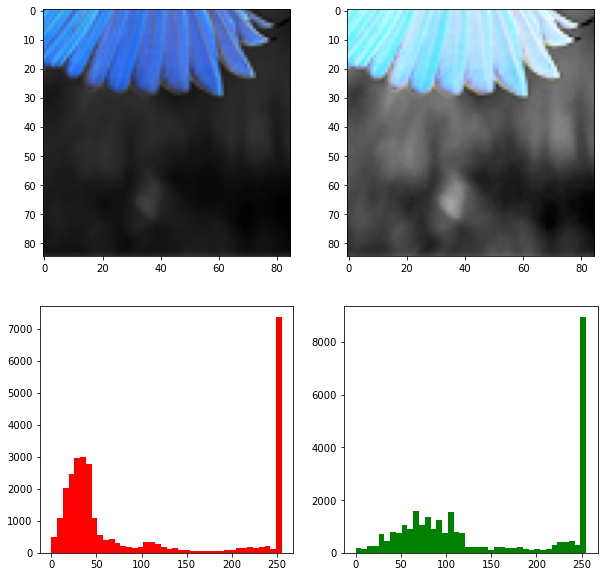

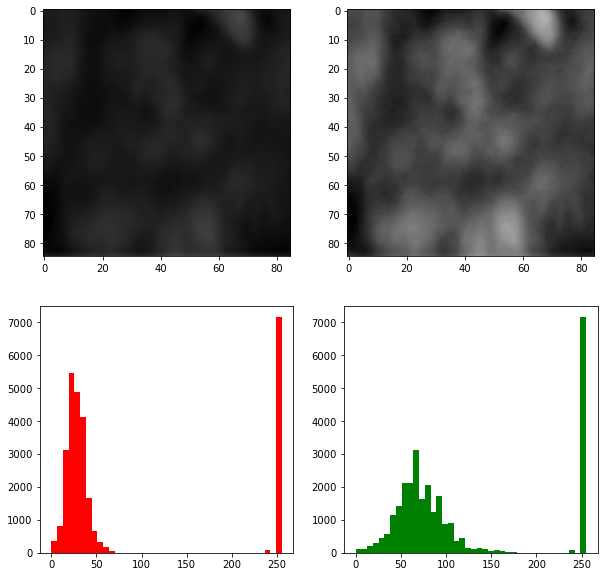

In [204]:
for i in range(0,s_i.shape[0],D):
    for j in range(0,s_i.shape[1],D):
        source = s_i[i:i+D , j:j+D]
        target = t_i[i:i+D , j:j+D]

        plt.figure(figsize=(10,10))

        plt.subplot(221)
        plt.imshow(source,cmap='gray')

        plt.subplot(222)
        plt.imshow(target,cmap='gray')

        plt.subplot(223)
        plt.hist(source.ravel(), bins=40, histtype='bar', color='red')

        plt.subplot(224)
        plt.hist(target.ravel(), bins=40, histtype='bar', color='green')

        ##########################################################################

        t_equalize = exposure.equalize_hist(target)

        source_unique, source_reconstruct, source_unique_counts =  np.unique(source, return_inverse=True, return_counts=True)
        target_unique, target_reconstruct, target_unique_counts =  np.unique(t_equalize, return_inverse=True, return_counts=True)
        #print(source_reconstruct)
        s_cumsum = (np.cumsum(source_unique_counts) / (np.cumsum(source_unique_counts)[-1]))
        t_cumsum = (np.cumsum(target_unique_counts) / (np.cumsum(target_unique_counts)[-1]))

        npinterp = np.interp(s_cumsum, t_cumsum, target_unique)

        o_i[i:i+D, j:j+D] = npinterp[target_reconstruct].reshape(target.shape)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

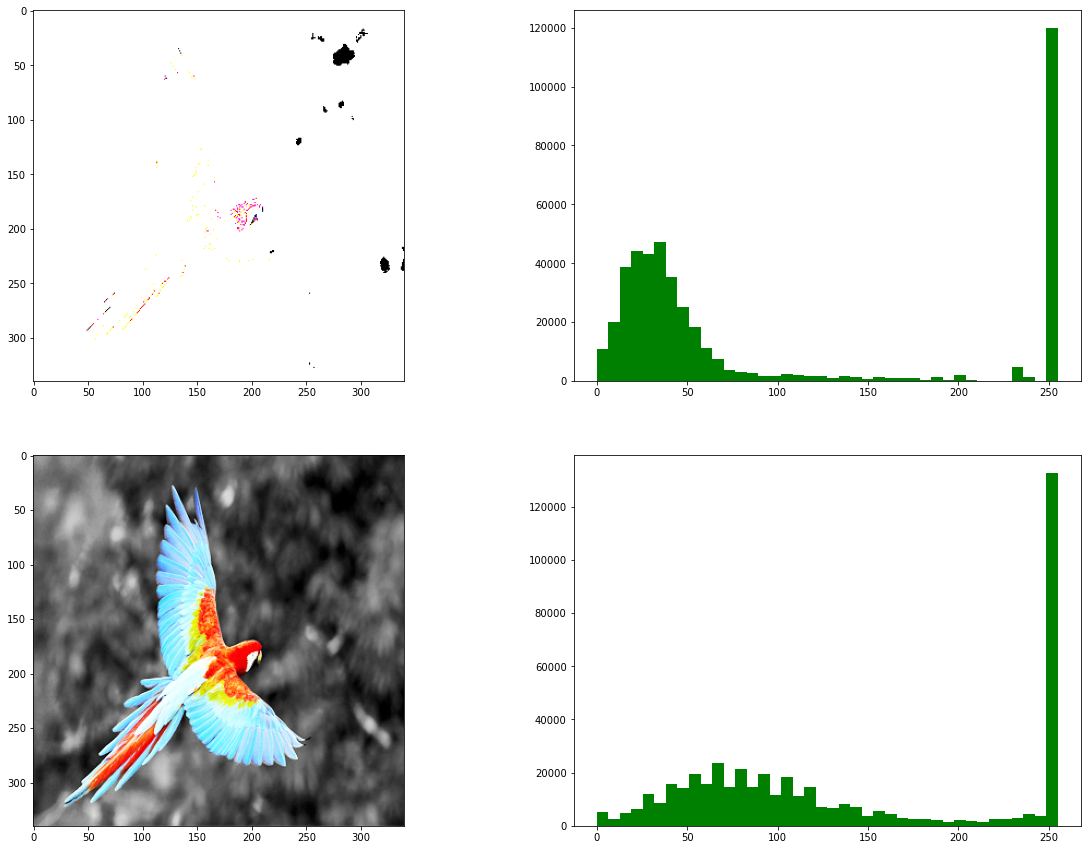

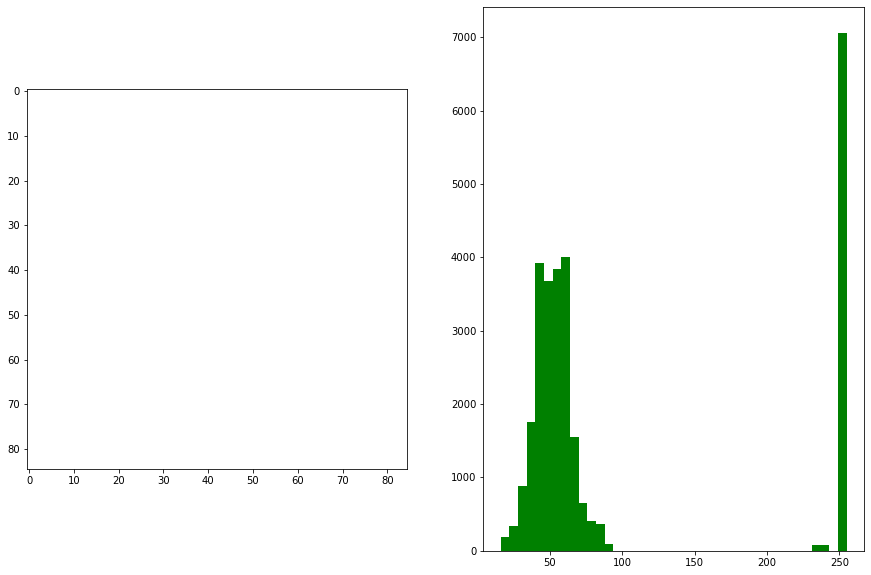

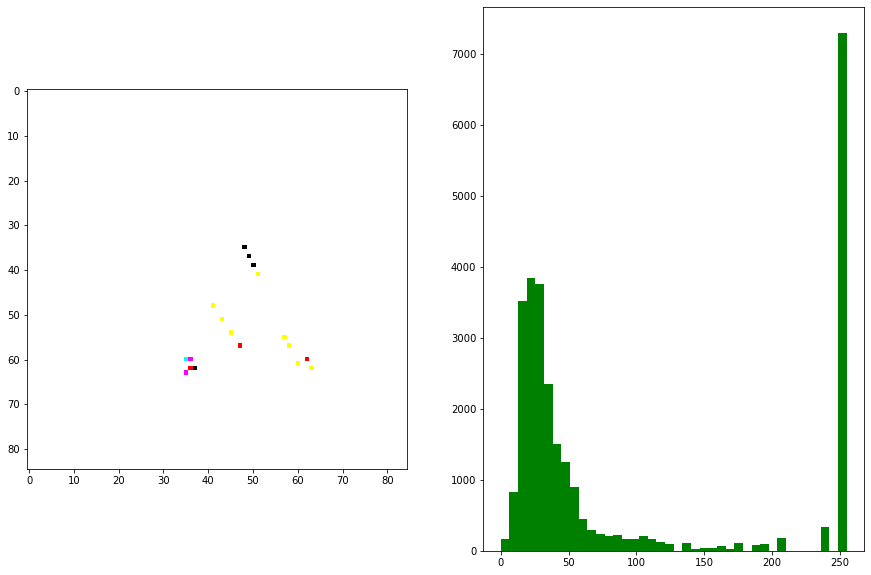

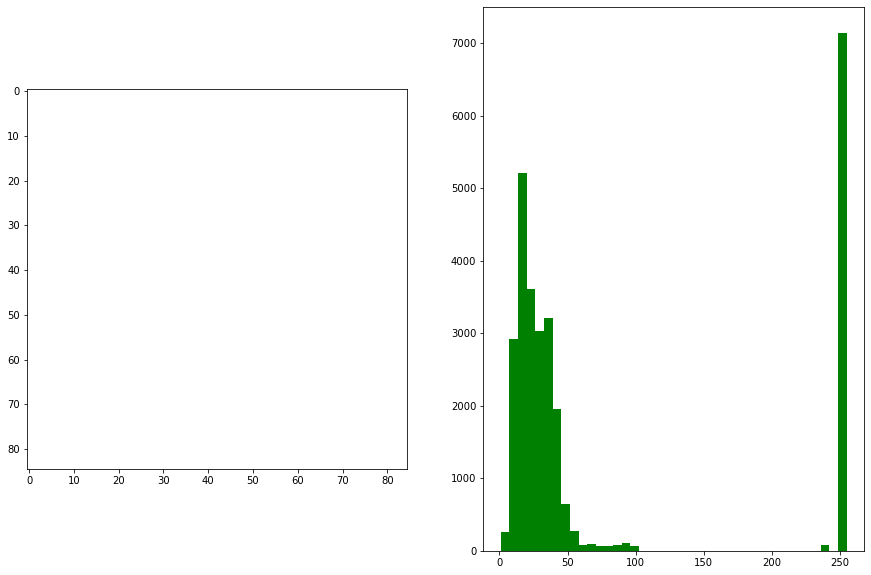

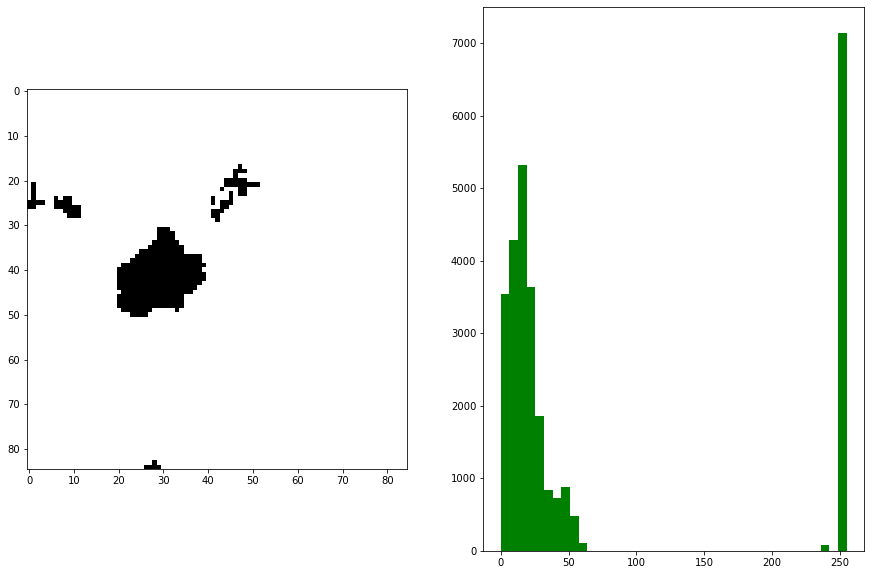

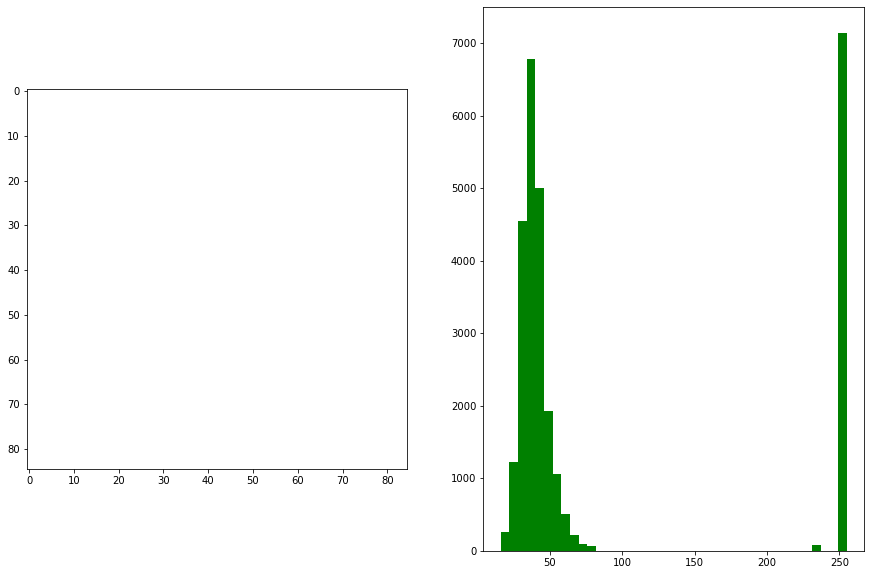

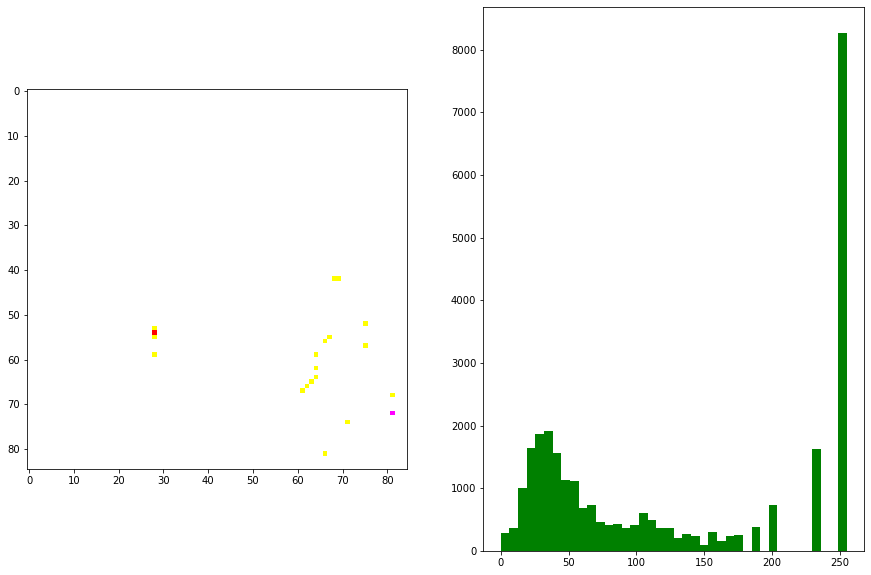

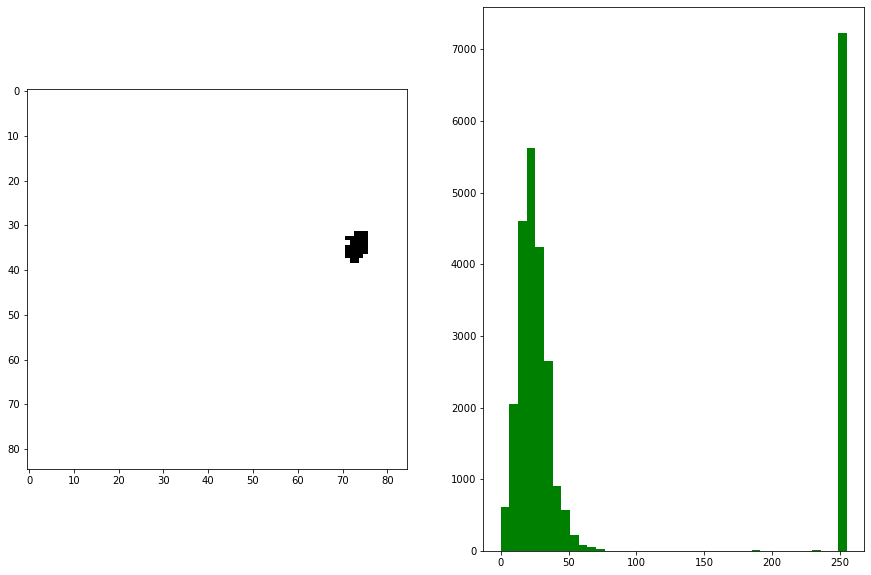

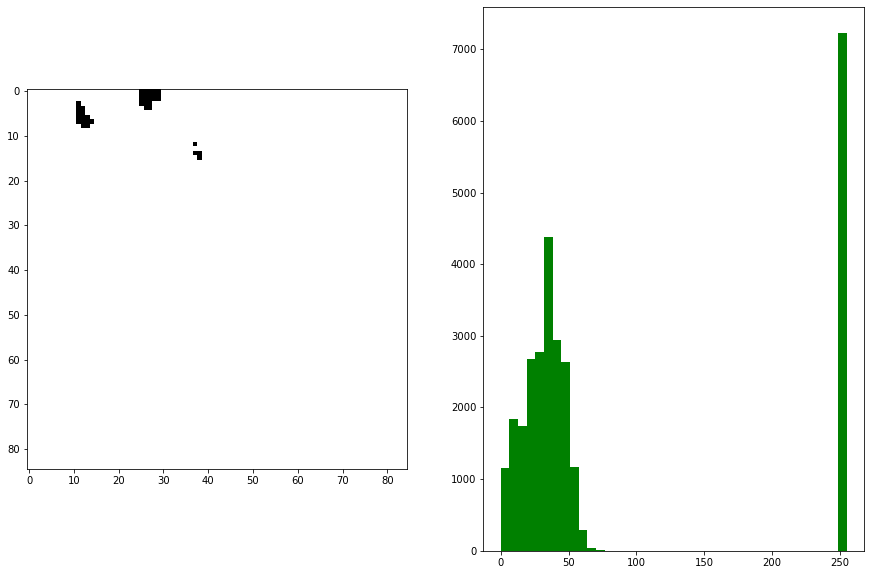

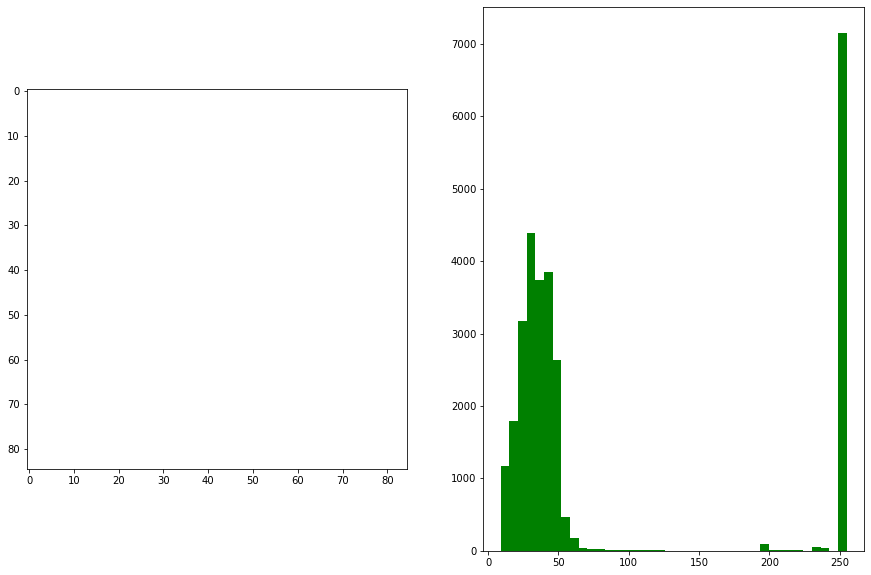

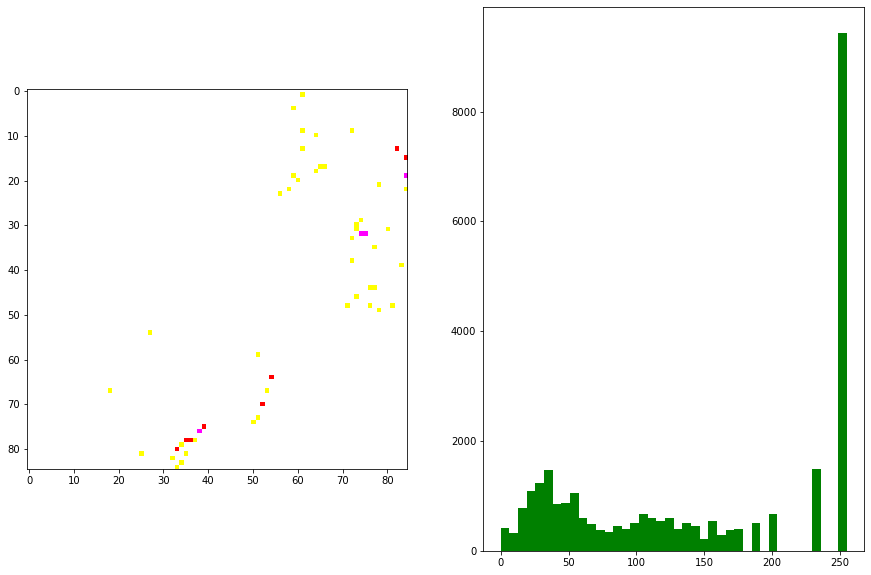

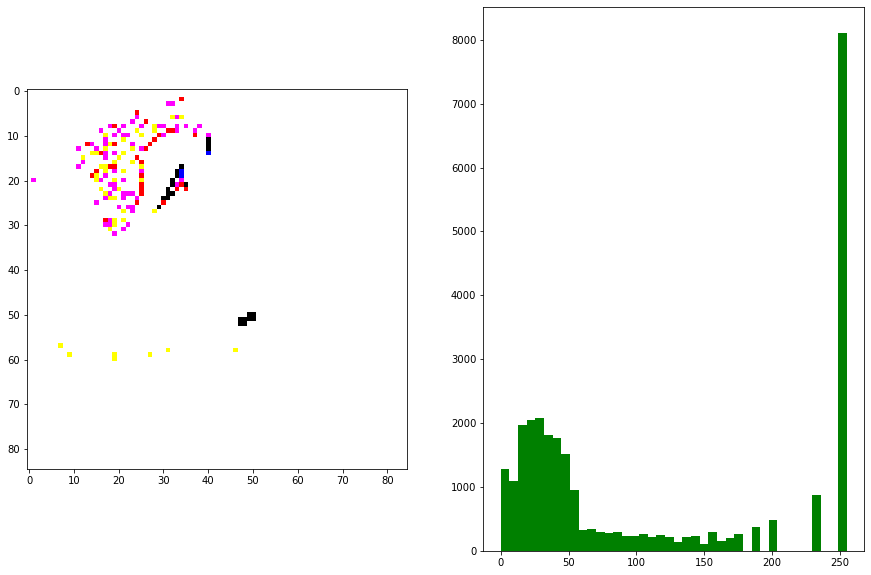

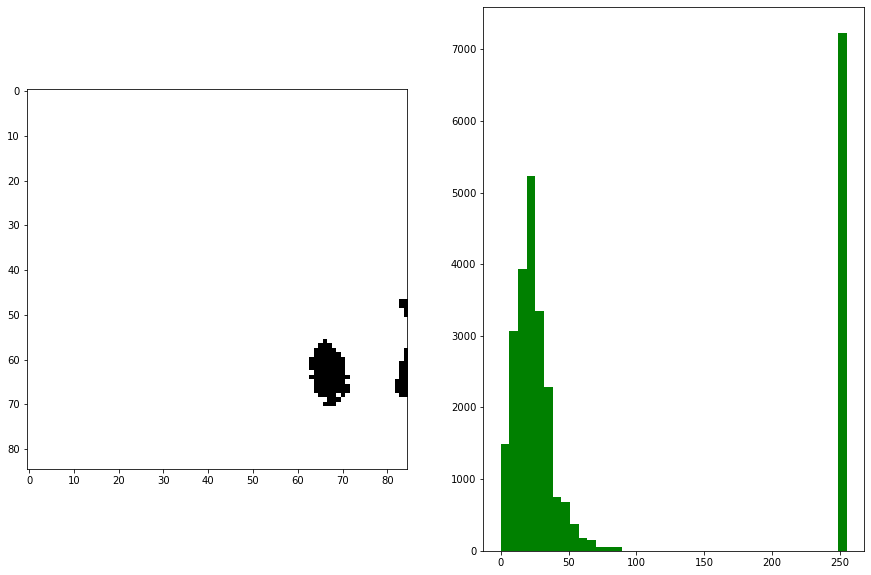

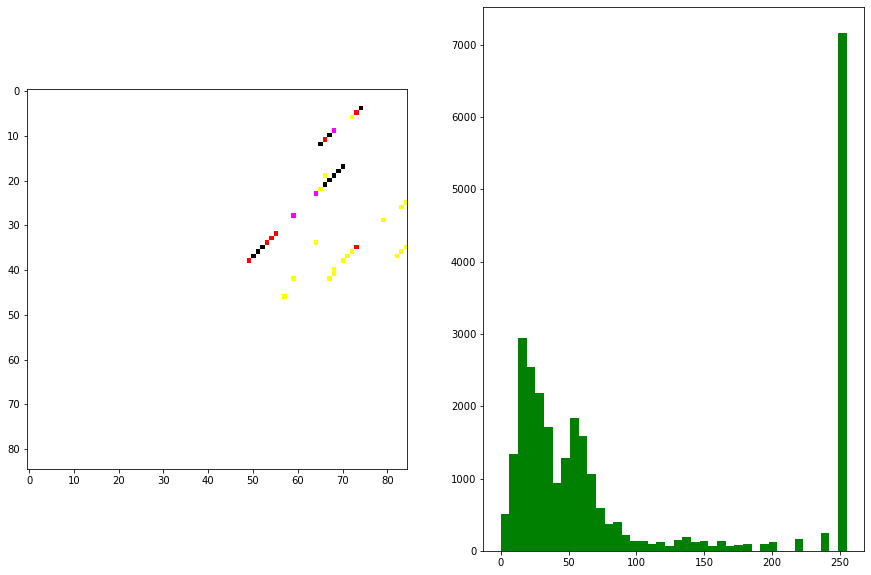

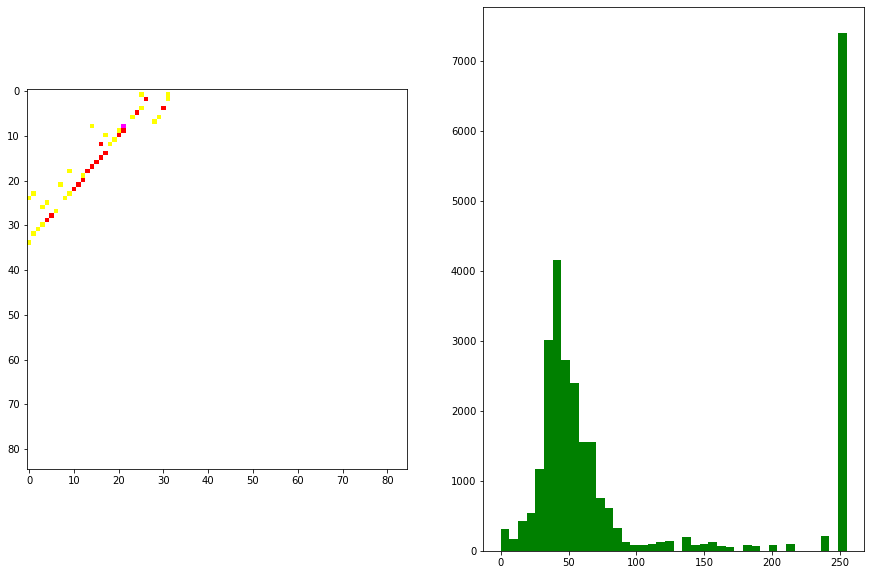

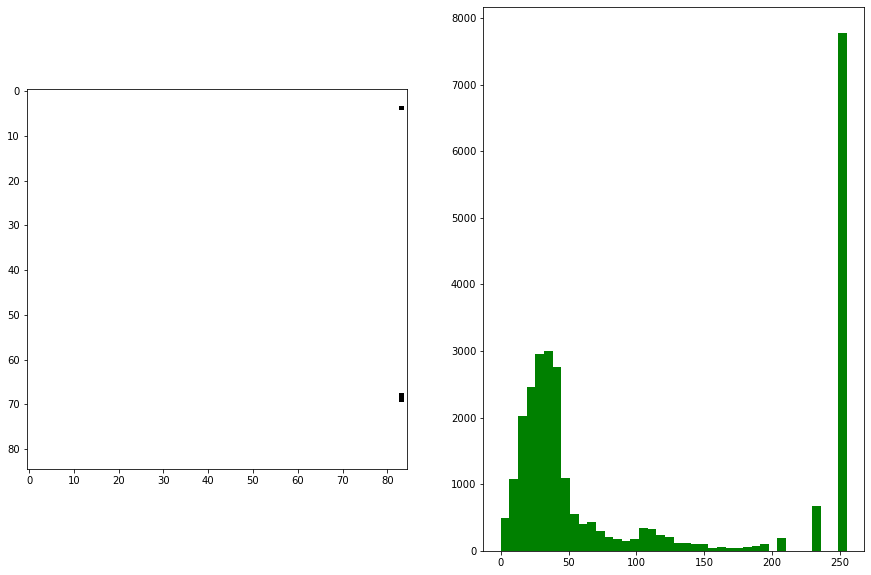

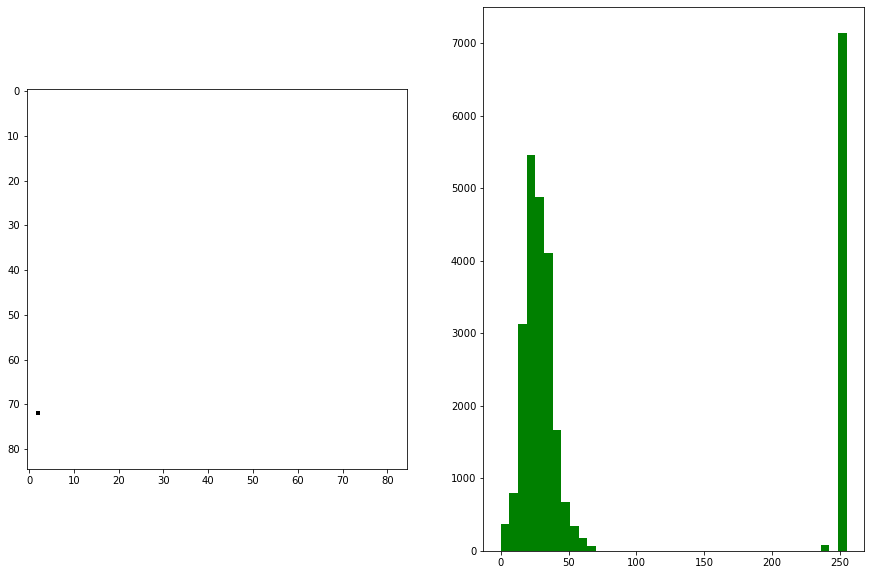

In [205]:
plt.figure(figsize=(20,15))

plt.subplot(221)
plt.imshow(o_i,cmap='gray')

plt.subplot(222)
plt.hist(o_i.ravel(), bins=40, histtype='bar', color='green')

plt.subplot(223)
plt.imshow(t_i,cmap='gray')

plt.subplot(224)
plt.hist(t_i.ravel(), bins=40, histtype='bar', color='green')

for i in range(0,o_i.shape[0],D):
    for j in range(0,o_i.shape[1],D):
        out = o_i[i:i+D , j:j+D]

        plt.figure(figsize=(15,10))

        plt.subplot(121)
        plt.imshow(out,cmap='gray')

        plt.subplot(122)
        plt.hist(out.ravel(), bins=40, histtype='bar', color='green')
